# Image compression using K-Means (Batch)


1.1 Image Compression Using Kmeans

Kmeans is by far the most common unsupervised learning algorithm. Given the dataset with sample points the goal is to find the groups which each sample belongs to. The algorithm is summarised by the following Figure

In [1]:
from IPython.display import Image


In [2]:
Image(url="https://stanford.edu/~cpiech/cs221/img/kmeansViz.png")

At the beginning of training, the centroids are initialised randomly.They get updated over time untill there is no further change in sample-cluster assignment. This notebooks shows how K-means algorithm can be applied to batch image compression.

In [3]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from joblib import dump
import matplotlib.pyplot as plt

In [4]:
#image sources:  https://pixabay.com
#https://pixabay.com/photos/cat-young-animal-curious-wildcat-2083492/
#https://pixabay.com/photos/cat-sad-cute-small-sweet-pet-3266673/
ROOT = 'data/'
images_path = os.listdir("./data")

In [5]:
def read_image(paths):
    images = []
    for path in paths:
        im = Image.open(ROOT+path)
        im = im.resize((640, 480), Image.ANTIALIAS)
        images.append(np.asarray(im))
    return np.array(images)

In [6]:
images = read_image(images_path)

In [7]:
images.shape

(3, 480, 640, 3)

In [8]:
def plot(images):
    fig = plt.figure(figsize = (20, 20))
    columns = 4
    rows = 1
    for i in range(1, images.shape[0]+1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(images[i-1])
    plt.show()

In [9]:
# reshape array (remove rows and columns)
image_height = images.shape[1]
image_width = images.shape[2]
new_images = np.reshape(images, (images.shape[0]*image_height * image_width, 3))


In [10]:
new_images.shape

(921600, 3)

In [11]:
centroids = 20
max_iterations = 40
verbosity = 0
model = KMeans(n_clusters = centroids, max_iter = max_iterations, verbose = verbosity)
model.fit(new_images)

KMeans(max_iter=40, n_clusters=20)

In [12]:
# centroids & the labels of each sample
print(len(model.cluster_centers_), len(model.labels_))

20 921600


In [13]:
# replacing each pixel with cluster centroid
pcentroid = np.array([list(model.cluster_centers_[label]) for label in model.labels_]).astype("uint8")


In [14]:
# original image format
decompressed = np.reshape(pcentroid, (images.shape[0],image_height, image_width, 3), "C")

In [15]:
decompressed.shape

(3, 480, 640, 3)

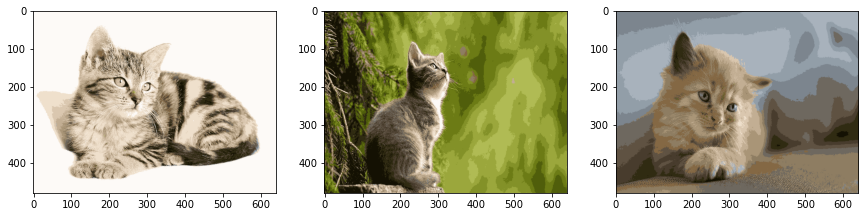

In [16]:
# decompressed images
plot(decompressed)

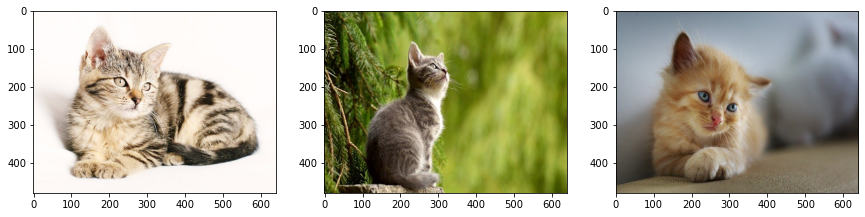

In [17]:
# original images
plot(images)

In [18]:
def save_im(images):
    for ix, im in enumerate(images):
        compressed_im = Image.fromarray(im)
        compressed_im.save(str(ix)+'.jpg')

In [19]:
save_im(decompressed)